<h1 style="text-align: center;">Partial Fraction Expansion</h1>
<p style="text-align: center;">Lab 6</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Use **scipy.signal.residue()** to perform partial fraction expansion. 

### 2. Deliverables Overview 
##### Part 1  
[ ] Plot for the step response from the prelab for **Task 1**.  
[ ] Plot for the step response using **scipy.signal.step()** for **Task 2**.  
[ ] Printed output for the partial fraction expansion for **Task 3**
  
##### Part 2
[ ] Printed output for the partial fraction expansion for **Task 1**
[ ] Plot for the response using the **Cosine Method** for **Task 2**.  
[ ] Plot the response using **scipy.signal.step() for **Task 3**  

### 3. Part 1
##### 3.1 Purpose
To plot the step response of your prelab results and then use the **scipy.signal.residue()** function to perform partial fraction expansion on the S-domain system found in the prelab.  
##### 3.2 Tasks   
1. Plot the step response $y(t)$ that you found by hand in the prelab assignment from $0 \le t \le 2$ s.

In [1]:
# Insert all necessary imports here
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Insert your step function from previous labs here
def step(t): # my step function
    """
    Signal u(t) creation
    Inputs: t - time vector
    Oututs: u - generated signal u(t)
    """ 
    u = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            u[i] = 0
        else:
            u[i] = 1
    return u

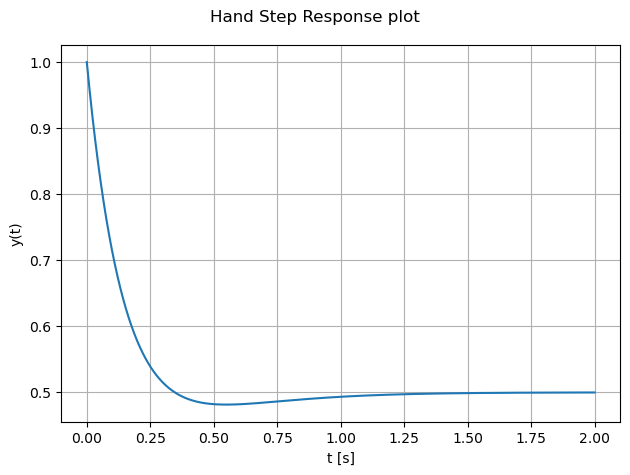

In [3]:
# Insert code creating your prelab response and plotting that response here
steps = 1e-3
t = np.arange(0, 2 + steps, steps)

y = (0.5-0.5*np.exp(-4*t)+np.exp(-6*t))*step(t)

plt.figure()
plt.suptitle("Hand Step Response plot")

plt.plot(t,y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

2. Using the $H(s)$ that you found in the prelab, plot the step response using the **scipy.signal.step()** command. *Note: The plots from Tasks 1 and 2 should be identical.* 

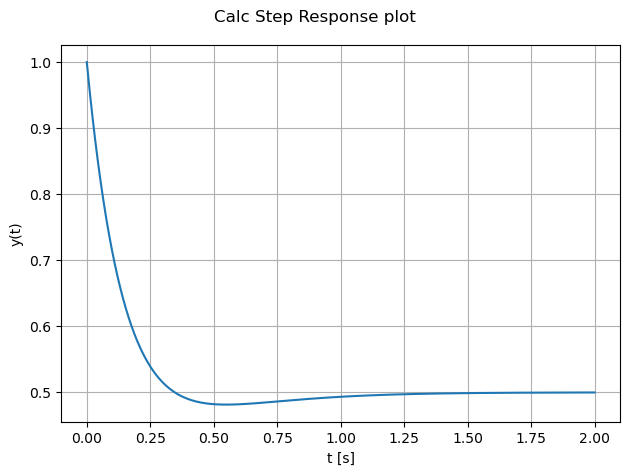

In [4]:
# Insert code creating and plotting the step response using scipy.signal.step() here
steps = 1e-3
t = np.arange(0, 2 + steps, steps)

num = [1, 6, 12]
den = [1, 10, 24]

tout, yout = sig.step((num, den), T = t)

plt.figure()
plt.suptitle("Calc Step Response plot")

plt.plot(tout,yout)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

3. Entering $Y(s)$ (i.e. $Y(s) = H(s)X(s)$) from the prelab into **scipy.signal.residue()**, print the partial fraction expansion results R, P, and K. Compare this expression with the partial fraction expansion results derived by hand in the prelab and check that they agree. *Note: You can look up how to use the **scipy.signal.residue()** function in the scipy.signal documentation. The den array used in the **scipy.signal.residue()** function will **not** be the same as the one used in the **scipy.signal.step()** function in Task 2.*

In [5]:
# Insert code using scipy.signal.residue() to find the partial fraction terms and print R, P, K.
num = [1, 6, 12]
den = [1, 10, 24, 0]

R, P, K = sig.residue(num, den)

print("Residues (R):", R)
print("Poles (P):", P)
print("Direct terms (K):", K)

Residues (R): [ 0.5 -0.5  1. ]
Poles (P): [ 0. -4. -6.]
Direct terms (K): []


### 4. Part 2
##### 4.1 Purpose
Use **scipy.signal.residue()** to perform partial fraction expansion on a function that would be difficult to analyze by hand.
##### 4.2 Tasks   
A system is described by: $$y^{(5)}(t) + 18y^{(4)}(t) + 218y^{(3)}(t) + 2036y^{(2)}(t) + 9085y^{(1)}(t) + 25250y(t) = 25250x(t)$$  
1. For the system described above, use **scipy.signal.residue()** to find the partial fraction expansion of the step response and print the results R, P, and K.

In [6]:
# Insert code using scipy.signal.residue() to find the partial fraction terms and print R, P, K.
num = [25250]
den = [1, 18, 218, 2036, 9085, 25250, 0]

R, P, K = sig.residue(num, den)

print("Residues (R):", R)
print("Poles (P):", P)
print("Direct terms (K):", K)

Residues (R): [ 1.        +0.j         -0.48557692+0.72836538j -0.48557692-0.72836538j
 -0.21461963+0.j          0.09288674-0.04765193j  0.09288674+0.04765193j]
Poles (P): [  0. +0.j  -3. +4.j  -3. -4.j -10. +0.j  -1.+10.j  -1.-10.j]
Direct terms (K): []


2. Using the results from **Part 2, Task 1**, plot the time-domain response from $0 \le t \le 4.5$s using the cosine method. *Note: in Dr. Sullivan's notes, k is the residue of a given term. Also, the factor of 2 accounts for both terms in a complex conjugate pair.*

In [7]:
# Insert your cosine method as a function here
def cos_method(r, p, t):
    """
    Uses the cos method to find the impulse response,
    Inputs: r - residues vector to calculate respon
            t - time vector to determine the response
    Outputs: y - impulse response calculated using the Cos Method
    """
    result = np.zeros_like(t, dtype=complex)
    for i in range(len(r)):
        result += np.abs(r[i]) * np.exp(np.real(p[i]) * t) * np.cos(np.imag(p[i]) * t + np.angle(r[i]))*step(t)
    return np.real(result)

    # y=|k|e^(at) cos(wt+<k)u(t)
    # k->|R|<R
    # P=a+jw

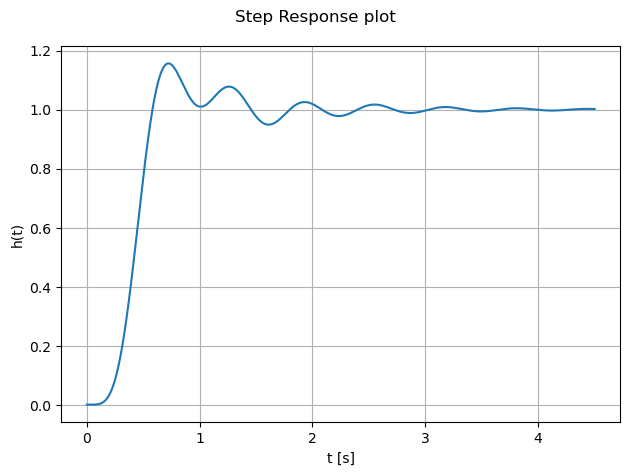

In [8]:
# Insert code calling the cosine method and plotting the response here
steps = 1e-3
t = np.arange(0, 4.5 + steps, steps)

y = cos_method(R, P, t)

plt.figure()
plt.suptitle("Step Response plot")

plt.plot(t,y)
plt.grid()
plt.ylabel("h(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

3. Using $H(s)$ from **Part 2, Task 1**, check your response from **Part 2, Task 2** using **scipy.signal.step()** and plot the results. *Note: Again, the den array used in **scipy.signal.step()** will **not** be the same as the one used in **scipy.signal.residue()** in **Part 2, Task 1**.*

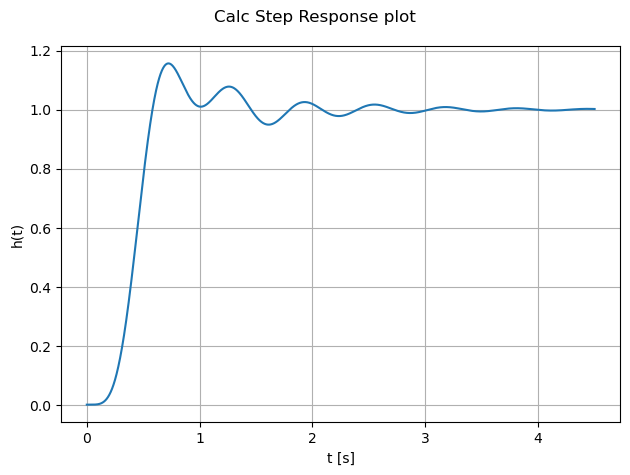

In [9]:
# Insert code creating and plotting the step response using scipy.signal.step() here
steps = 1e-3
t = np.arange(0, 4.5 + steps, steps)

num = [25250]
den = [1, 18, 218, 2036, 9085, 25250]

tout, yout = sig.step((num, den), T = t)

plt.figure()
plt.suptitle("Calc Step Response plot")

plt.plot(tout,yout)
plt.grid()
plt.ylabel("h(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

### 5. Questions
1. For a non-complex pole-residue term, you can still use the cosine method, explain why this works.  
>This works because the impulse response of a system with real poles is represented by the sum of decaying exponentials multiplied by cosine terms. This format is the same as the cosine method's.
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>